# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [52]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from IPython.display import display, Math, Latex
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price =  np.max(prices)

# TODO: Mean price of the data
mean_price =  np.mean(prices)

# TODO: Median price of the data
median_price =  np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

- `'RM'` (average number of rooms): I would expect a home to have a higher value as the value of RM increases in the initial set of values but it may plateau over large values, e.g. value of homes with RM = 3 will be higher than homes with RM = 1 but it may not increase at the same rate for large values, e.g. RM = 9 and RM=10 may not have the same rate of change in home values as RM=1 and RM=3.


- `'LSTAT'` (the percentage of homeowners considered "lower class") : I would expect the home values to decrease as the percentage of homeowners considered "lower class" increase. The reason being that if the neighborhood has higher percentage of lower class homeowners, it affects taxes, expenditure of the neighborhood and inadvertently imapct the services like school system.


- `'PTRATIO'` (the ratio of students to teachers in primary and secondary schools): Lower the ratio, higher the home values as people will be willing to pay a higher price for a child's good education.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    from sklearn.metrics import r2_score
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** 0.923

**Response:** Yes, based on what has been shared in the material so far, this model has successfully captured the variation of the target variable as R^2 is 0.923 which implies that the model explains 92.3% variance in the target. However, in the real world there are other metrics which are considered e.g. Adj-R^2 and factors like the number of features do have an impact on whether it's the right model as model complexity becomes cruciual when the time comes for deployment.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(features,prices, random_state=0,test_size=0.20,)

# Success
print "Training and testing split was successful."
#print features.shape
#print X_train.shape
#print X_test.shape

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** By splitting the dataset in training and testing subsets, we test our model on a dataset that has not been seen during training the model. This provides us an opportunity to test how well our model will perform once it is deployed in usage. 
By keeping a test set aside, we try to assess how well our model will predict the target on data points which are not part of training set. This gives an indication of both bias and variance of the model. 

**What can go wrong: ** If the model performs really well on Training set but performs poorly on test set (i.e. has difficulty in appropraitely predicting output), it can be inferred that a fairly complex model has been trained which isn't generic enough to predict never-before-seen data. It is very specific to Training data.
This is also known as overfitting.

If the model performs poorly on Training data itself, it means that the model is not complex enough and has bias which needs to be addressed by adding more features or more data (underfitting).
PS: In reality, one also needs to consider cross-validation dataset which can be utilized to obtain apporpriate values for hyperparameters.

In either case of underfitting and overfitting, we risk deploying a model which is either not specific or not generic respectively to be used with unseen data. Having a test set allows us to assess how well our model will perform. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

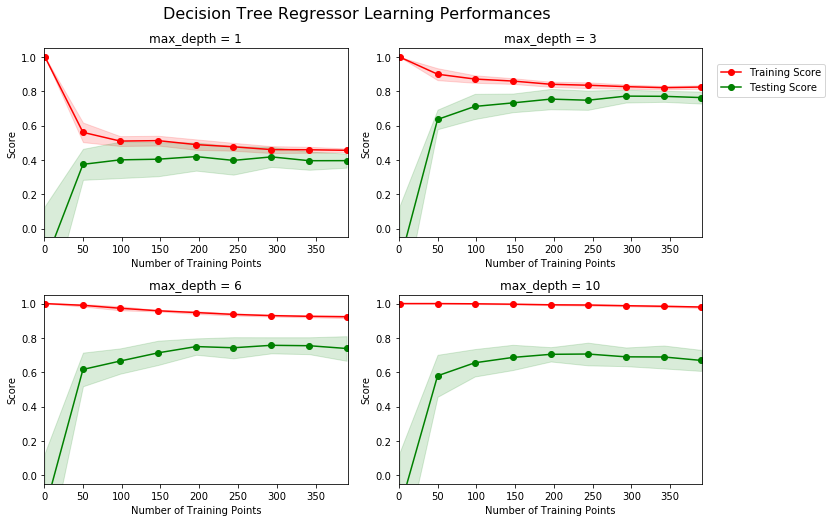

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** Picking up second graph of max_depth=3.


* In the beginning, training curve starts from 1 and test curve at 0. This indicates that our fit method is able to accuractely predict the training observations quite well but with limited training data, as there are only a few training examples, our fit algorithm is not able to generalize well and is not able accurately predict test data observations. 

* As more training points are added, the training curve first decreases and then stabilizes at around 0.8. At the same time, test curve sharply increases and then stabilizes around low 0.7 but as the training size increases from 250 to 300, we see another small uptick in test curve. As more data is added to training set the regressor is able generalize better as it sees the vareity in the training set which can be be used to better predict test observations.However, the increase in size only helps up to a certain point as more training data is not able to siginificantly improve the score.

* Yes, in general having more training points benefit the model but it only helps to a certain point where adding more data may not make considerable improvements in the resulting model. Once, the model has identified the key components driving the variance in the target from predictor variables, not many improvements can be made with more data.  Moreover, having more training data than what is required can lead to other issues pertraining to the ability to fit the model in the desired time and space (memory). While more data trumps better algorithms at times, it is also important to consider other techniques like cross-validation, bootstrapping, boosting to improve model accuracy.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

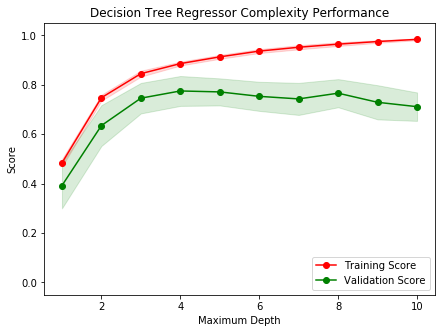

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

** maximum depth of 1 ** 
This is a case of high bias as the model is quite generic and is not able to pick up specific patterns in the data and there are still key components that may be driving variance in the target. This results in underfitting as model is not even able to perform well on which it is being trained (even after having the ability to peek into the target). Visual cue is both low training score.

** maximum depth of 10 **
This is the case of high variance as the model is now overly sensitive to the nunances in the training data and hence is not able to generalize well on test data. Visual cue is the drop in test score as the maximum depth increases from 4 to 10 while the gap between training and test score rises. This is indicative of increase in the variance of the model.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** Maximum depth of 4 seems to be a good pick as the test score has reached a peak with limited model complexity (vs max depth of 8) and after max depth of 4, there is a drop in the score.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** Grid search is a technique usually applied to identify the optimal values for hyperparameters. These are the parameters besides those which are being estimateed (usually called parameter estimates or _beta_ ). An example of such a parameter is maximum depth in our model, such parameters have a direct impact on the accuracy of our model and therefore needs to be assessed while fitting the model to ensure that we are chosing the most optimal value of the same. Grid serach is applied by providing a list of some prior values to the fit algorithm. It allows us to perform a search over a list of hyper-parameter values to assess which value returns the most accurate model.



### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** In a traditional train/test split, we create a training and a test dataset. This means we fit and test our model only once. _k-fold-cross-validation_ training technique allows us to prepare _k_ equally sized datasets (folds) from our original dataset. We then perform training k times, where we use one of the folds for testing purposes while the remaining data (combined k-1 folds) is used for training purpose. This allows us to run k iterations of model fitting and provides different data for testing (and training) during each iteration.

The benefit this technique provides for grid search when optimizing a model is the ability to test our model parameters on distinct sets of test sets. Instead of having just one test set and trying to perform grid search, we may end up getting a value returned which is well suited for that particular instead of test set. Instead, in k-fold, we are trying vareity of values with a variety of test sets.


** Questions coming out of Review:  **

* Question 1:  Which data set will be split by GridSearchCV, the whole dataset or only the training data set (Hint: reg = fit_model(X_train, y_train))?

GridSearchCV uses the training dataset to conduct the search for the optimal values of the parameters. \_best\_params can be used to obtain the best parameter value among those which were part of our search space. Similarly, \_best\_scores can return the value of the best score for the corresponding value.
While the parameter values are returned from using the training set, the performance of the returned value is then measured on the cross-validation or test set (depending on the number of partitions of training data). More importantly, it needs to be evaluated on the dataset which was not used for idenitfying the value.

* Question 2: If we use the default Kfold method, the data will be split randomly or sequentially?

It is important to ensure that the data is randomized prior to splitting the data in the folds. If the data is not randomized properly, it can lead many issues including biases in the data which may exist purely due to sequential ordering of data, e.g. data ordered by target, a important date or by another important feature. This may lead to non-random splitting of the data and our algorithm will not be able get trained on the variety in the data as majority of the data may be of a specific segment yielding poor accuracy on validation/test set. Default Kfold method, does not shuffle data, however, there is a parameter for Kfold method, which when set to True, can handle shuffling for us. This parameter is called _shuffle_ and needs to be assigned the value _True_.

* Question 3: After we run k times and get k validation scores, how do we use these scores to help us find the best combination of parameters?

Kfold allows us to fit k models and we are returned with k validation scores. Upon getting k validation scores, we take an average of these k scores to assess the accuracy of our model. When used in conjunction with GridSearchCV, a score is computed as the model parameters are estimated and hyper-parameter search space is evaluated for the parameter value which maximizes (or minimizes depending on the problem) the cross-validation score. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [64]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    from sklearn.metrics import make_scorer
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    from sklearn.grid_search import GridSearchCV
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [65]:
reg = fit_model(X_train, y_train)

In [66]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** Optimal model has max_depth of 4, this matches wth my guess in ** Question 6 **

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [50]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: ** I will answer the __reasonable__ part first. By _reasonable_, I am going to assume that a house with more house, in a low poverty neighborhood and a low Student-teacher ratio school district should be priced higher. In other words, all things equal, someone with more rooms should get more money on their house (and a similar treatment for other metrics). 

Based on limited information, assuming that these house prices are from a similar setting (sub-urban vs downtown vs inner-city), I believe the prices are reasonable because largest house in a low poverty neighborhood with low Student-teacher ratio is priced higher while the smallest house has the lowest price. 
However, in real world, there could be other factors (including those not added to our feature set at this point) that can have an impact on the pricing. As an example, the houses in downtown area are often smaller (condos) and may cost twice as much than a larger house in sub-urban setting and while the area could have low poverty level, the Teacher-student ratio can be higher due to the density of population in a smaller area. Here, the house value is largely defined by the popular saying of "Location, Location, Location driving the house cost". People may prefer to live in the area due to it's proximity to city center, work or other factors (like good schools, parks, outdoor activities (on a lighter note, which may only last 2 months in Boston weather). Hence, we may be overlooking many other features like whether it's close to business district, "distance to..." type of features from our feature set. Hence the model needs to be refined further if it were to be used in real world setting.

Coming to the first question, below are the metrics from Data Exploration section:
Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13

One quick observation is the value of Std deviation of prices, it is quite high which along with the range of prices (Max - Min) talks about the variance of our price data.  In general, I would expect our model to perform well on the houses where the predicted price falls close to mean +/- 1 std dev, the naive rationale being that the model was exposed to many such houses in the trainig set with the abundance of house prices in this range and may tend to predict the house fairly well.

* **Selling price for Client 1's home: ** 
Based on arguments presented under the _reasonabilty of model_ and above, I would conclude that this is a fair estimate of the selling price.


* **Selling price for Client 2's home: **
Similar to earlier example, based on _reasonability of the model_ and above, this also seems a fair estimate of the selling price.


* **Selling price for Client 3's home: **
While the above arguments still hold true, however, this house is on the higher end of the price along with the size (see below charts). Based on the historical data, I may recommend my client to go above 1MM on this particular house as everything checksout well for this particular house in terms of size, along with desirability of school district.

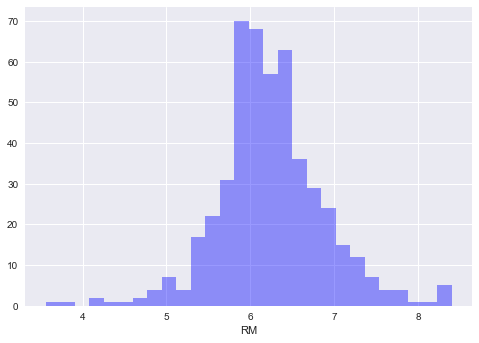

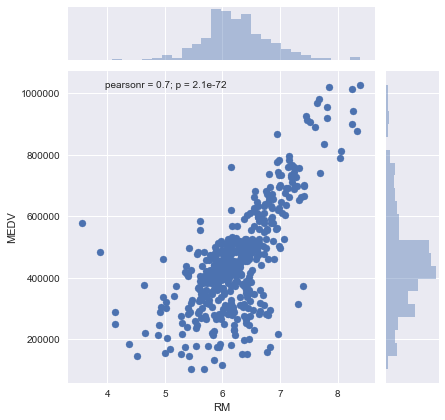

In [71]:
#data.head()
import seaborn as sns
sns.distplot(data['RM'], kde=False, color="b")
sns.jointplot(data['RM'],data['MEDV'])

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [51]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
In general, this model needs many more features to be used in real-world setting. I have already talked in detail about the aspect of important features in the response to *Question 10*.

* Relevance of data collected from 1978: We are aware how volatile the house prices can be during the boom and bust times so stale data definitely does not help our model. While the relationships between various factors and price may hold true even in the past, the target value itself may have changed drastically over time, along with the neighborhood characteristics, choices and preferences of people evolve over time, hence not providing a reasonable estimate to be used today.

* Model itself seems to have quite a bit of variance in making predictions ($73K range being an evidence of the same), this may not be a good model.

* Data collected in an urban city is specific to the characteristics of an urban city or in this case, more specific to MA or North-Eastern belt, hence it shouldn't be applicable to other areas (rural or otherwise). The distributions, relationships between variables may all be different in a different setting leading to inaccurate assessments, hence the model shouldn't be used elsewhere.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.